<a href="https://colab.research.google.com/github/Giovannacm/machine-learning/blob/main/CNN_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibliotecas

In [1]:
from google.colab import output

In [2]:
from keras.applications import VGG16
from keras.models import Model

import keras.utils as image
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator

import os
import pandas as pd

# Dados

In [ ]:
! mkdir ~/.kaggle/

In [5]:
! cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle datasets download -d alxmamaev/flowers-recognition
output.clear()

In [8]:
! mkdir flowers-data
! unzip flowers-recognition.zip -d flowers-data
output.clear()

In [9]:
! kaggle competitions download -c dogs-vs-cats
output.clear()

In [10]:
! mkdir animals-data
! unzip dogs-vs-cats.zip -d animals-data
output.clear()

In [11]:
! mkdir animals-data/train
! unzip animals-data/train.zip -d animals-data/train
output.clear()

In [26]:
img_flower_path = '/content/flowers-data/flowers' + '/daisy/13953307149_f8de6a768c_m.jpg'

In [5]:
img_animal_path = '/content/animals-data/train/train' + '/cat.64.jpg'

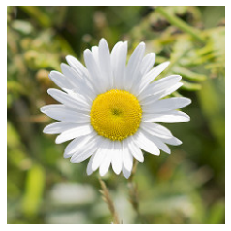

In [27]:
img = image.load_img(img_flower_path, target_size=(224, 224))

plt.imshow(img)
plt.axis('off')
plt.show()

In [28]:
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
#img_tensor /= 255.

print(img_tensor.shape)

(1, 224, 224, 3)


# Instanciando a rede

In [8]:
vgg = VGG16(weights='imagenet', include_top=True)
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

# Feature maps

In [29]:
layer_outputs = [layer.output for layer in vgg.layers if 'conv1' in layer.name]
model = Model(inputs=vgg.inputs, outputs=layer_outputs)
feature_maps = model.predict(img_tensor)

1/1 [==============================] - 1s 1s/step


## Feature map *x* da primeira camada convolucional dos 5 blocos

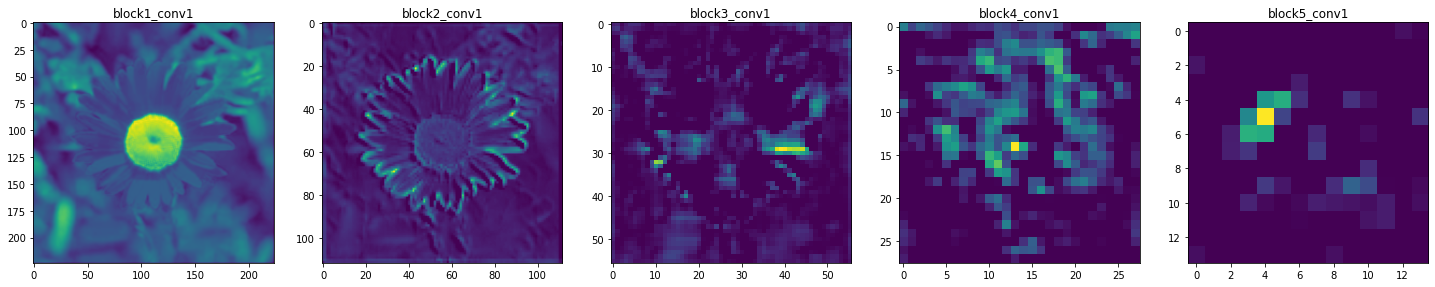

In [30]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(25, 5))
layer_names = ['block1_conv1', 'block2_conv1', 'block3_conv1', 'block4_conv1', 'block5_conv1']
layer_name_count = 0

feature_index = 25

for ax, layer_activation in zip(axs.flat, feature_maps):
  ax.imshow(layer_activation[0, :, :, feature_index], cmap='viridis')
  ax.set_title(str(layer_names[layer_name_count]))
  layer_name_count += 1

## Todos os feature maps da primeira camada convolucional do primeiro bloco

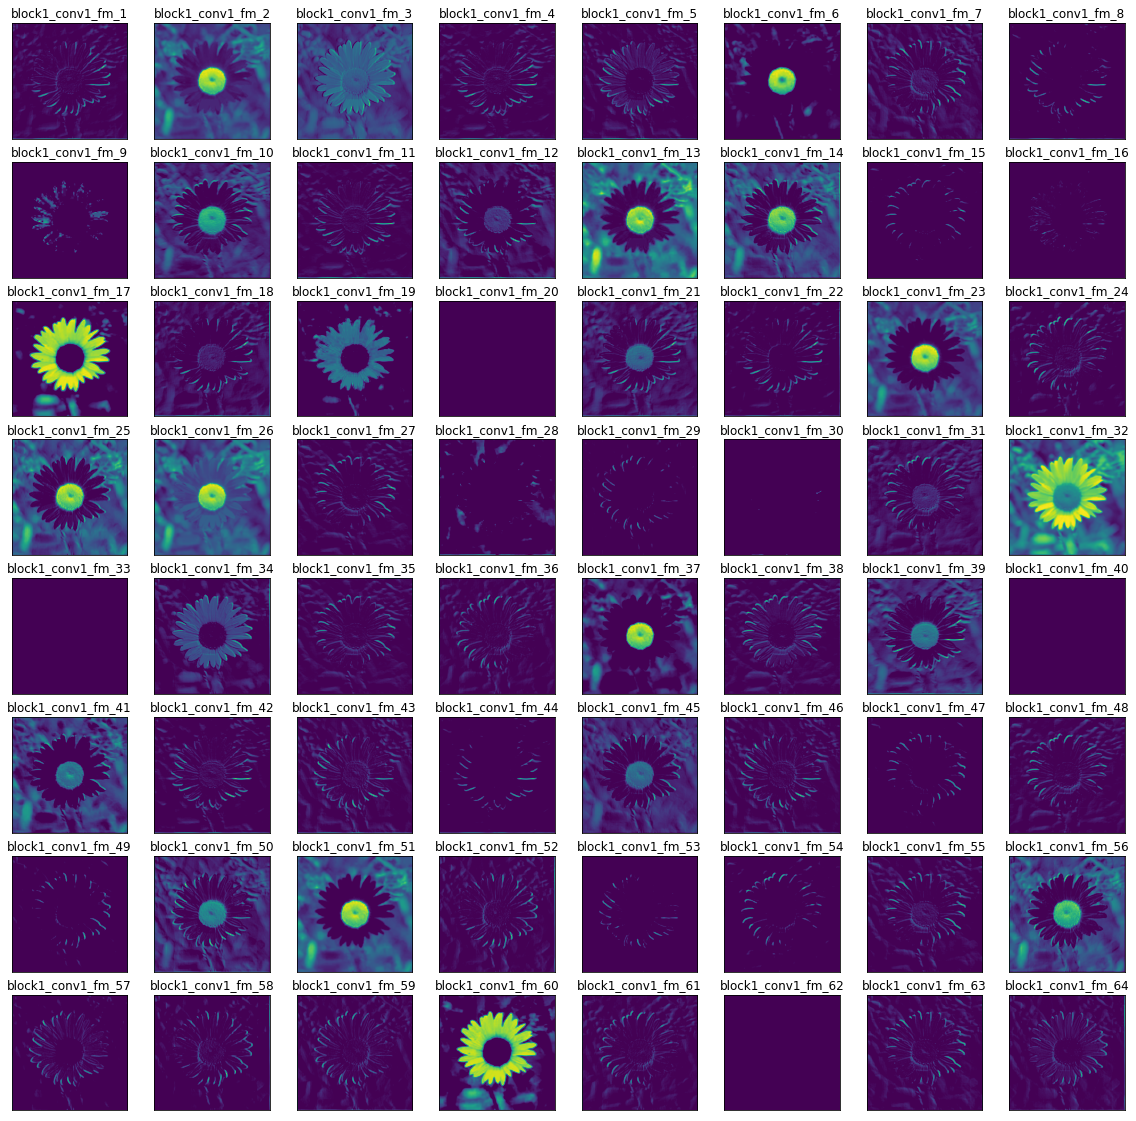

In [31]:
fig, axs = plt.subplots(nrows=8, ncols=8, figsize=(20, 20), subplot_kw={'xticks': [], 'yticks': []})
feature_cont = 0
first_conv_feature_maps = feature_maps[0]

for ax in axs.flat:
  ax.imshow(first_conv_feature_maps[0, :, :, feature_cont], cmap='viridis')
  ax.set_title('block1_conv1_fm_' + str(feature_cont+1))
  feature_cont += 1

## 64 feature maps da primeira camada convolucional do quinto/último bloco

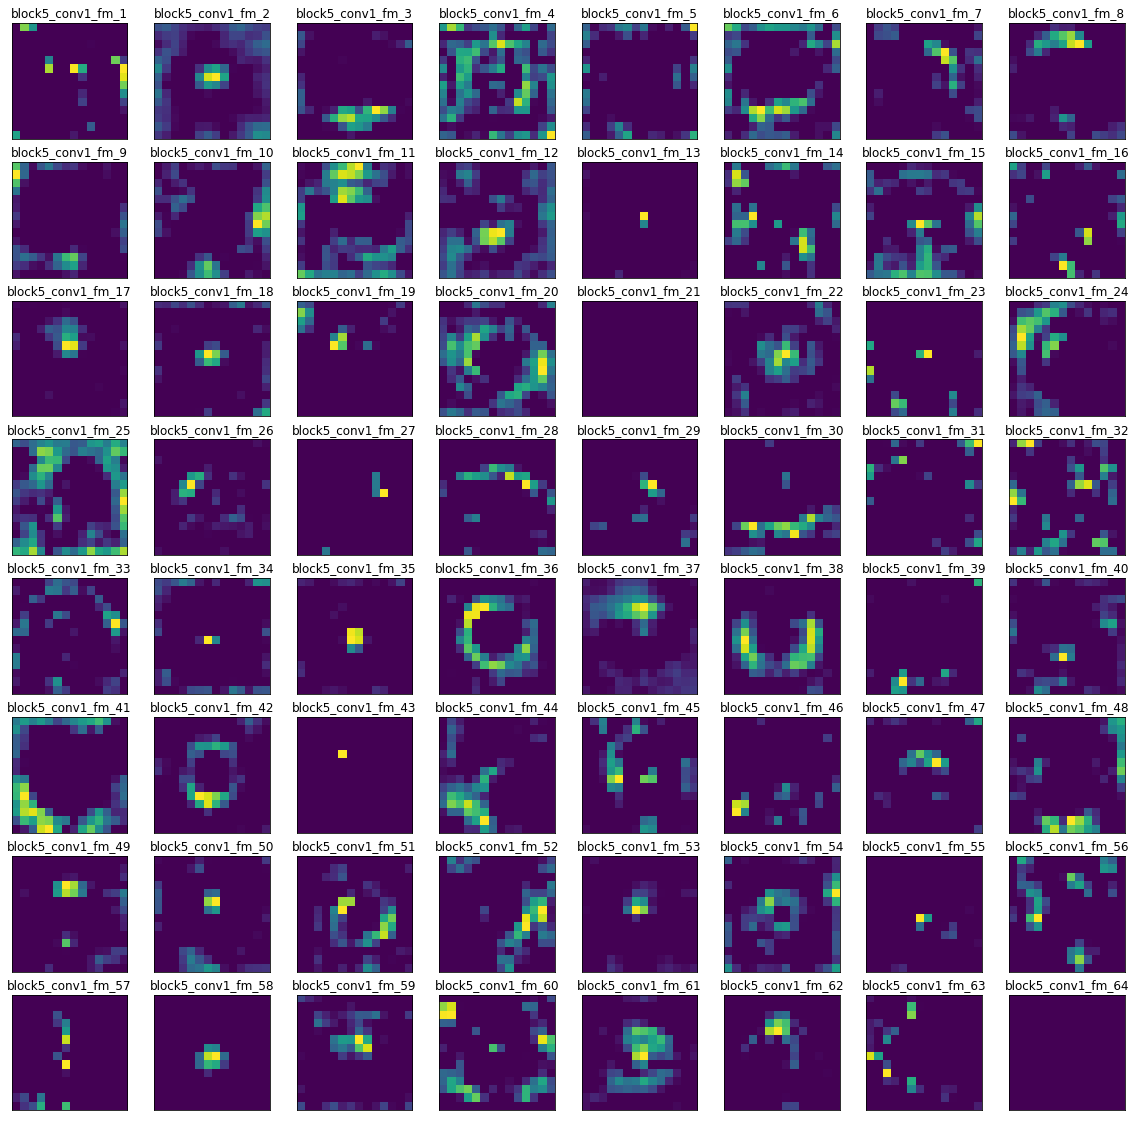

In [32]:
fig, axs = plt.subplots(nrows=8, ncols=8, figsize=(20, 20), subplot_kw={'xticks': [], 'yticks': []})
feature_cont = 0
first_conv_feature_maps = feature_maps[4]

for ax in axs.flat:
  ax.imshow(first_conv_feature_maps[0, :, :, feature_cont], cmap='viridis')
  ax.set_title('block5_conv1_fm_' + str(feature_cont+1))
  feature_cont += 1

# Filtros

In [33]:
for layer in vgg.layers:
  if 'conv' not in layer.name:
    continue
  filters, biases = layer.get_weights()
  print(layer.name, '->', filters.shape)

block1_conv1 -> (3, 3, 3, 64)
block1_conv2 -> (3, 3, 64, 64)
block2_conv1 -> (3, 3, 64, 128)
block2_conv2 -> (3, 3, 128, 128)
block3_conv1 -> (3, 3, 128, 256)
block3_conv2 -> (3, 3, 256, 256)
block3_conv3 -> (3, 3, 256, 256)
block4_conv1 -> (3, 3, 256, 512)
block4_conv2 -> (3, 3, 512, 512)
block4_conv3 -> (3, 3, 512, 512)
block5_conv1 -> (3, 3, 512, 512)
block5_conv2 -> (3, 3, 512, 512)
block5_conv3 -> (3, 3, 512, 512)


## Filtro *x* da primeira camada convolucional dos 5 blocos

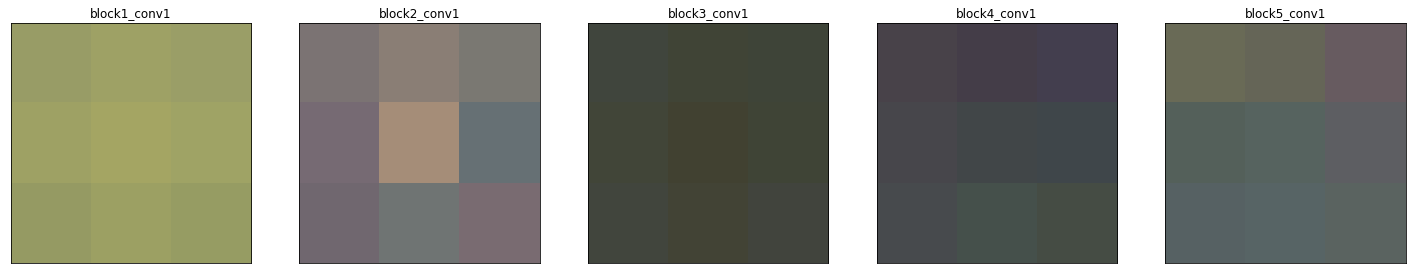

In [34]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(25, 5), subplot_kw={'xticks': [], 'yticks': []})

layer_names = ['block1_conv1', 'block2_conv1', 'block3_conv1', 'block4_conv1', 'block5_conv1']
layer_index = [1, 4, 7, 11, 15]
layer_count = 0
filter_index = 25

for ax in axs.flat:
  filters, biases = vgg.layers[layer_index[layer_count]].get_weights()

  f_min, f_max = filters.min(), filters.max()
  filters = (filters - f_min) / (f_max - f_min)

  ax.imshow(filters[:, :, 0:3, filter_index], cmap='viridis')
  ax.set_title(str(layer_names[layer_count]))
  layer_count += 1

## Todos os filtros da primeira camada convolucional do primeiro bloco

In [35]:
filters, biases = vgg.layers[1].get_weights()

f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

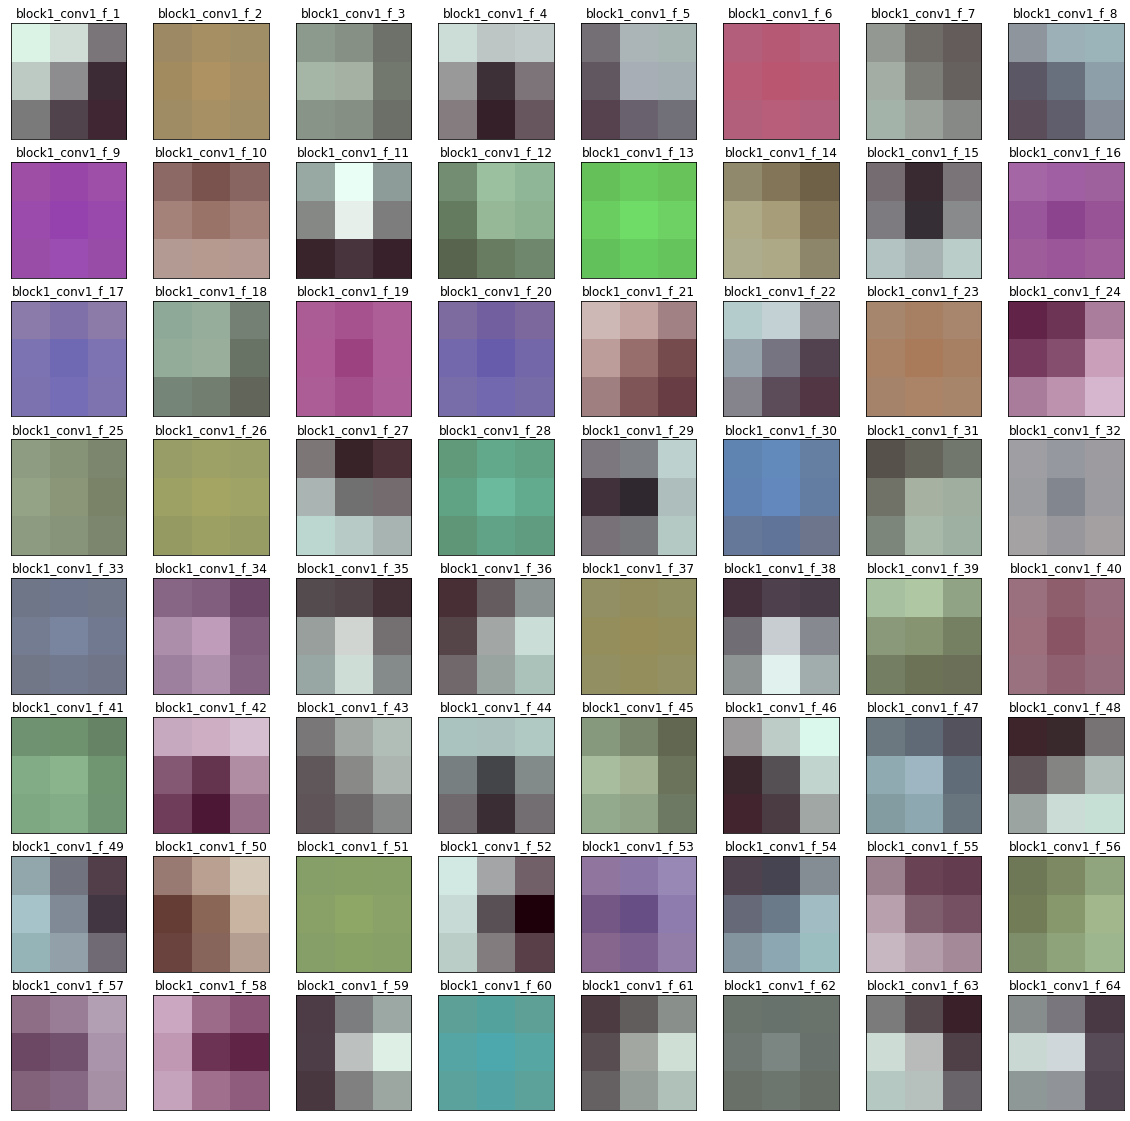

In [36]:
fig, axs = plt.subplots(nrows=8, ncols=8, figsize=(20, 20), subplot_kw={'xticks': [], 'yticks': []})
feature_count = 0

for ax in axs.flat:
  ax.imshow(filters[:, :, :, feature_count], cmap='viridis')
  ax.set_title('block1_conv1_f_' + str(feature_count+1))
  feature_count += 1

# Saída da rede

In [37]:
predict_img = vgg.predict(img_tensor)
predict_img

1/1 [==============================] - 1s 707ms/step


array([[8.43776660e-10, 2.80334490e-07, 1.07425471e-10, 1.23508301e-10,
        6.22974428e-09, 7.26025684e-09, 9.13627485e-09, 4.54750591e-07,
        1.03030992e-07, 1.46132562e-09, 4.51994886e-08, 1.62501593e-07,
        1.02496486e-07, 4.50083313e-08, 1.28420570e-05, 8.90529122e-07,
        1.21073555e-07, 1.24744829e-05, 7.52518099e-06, 1.39613803e-07,
        7.31483141e-08, 1.48302519e-07, 2.41410856e-08, 3.58652272e-08,
        1.91415793e-07, 3.09932169e-08, 8.18447266e-09, 3.57759333e-08,
        1.62317200e-08, 5.38483702e-09, 3.47835254e-08, 3.90465296e-08,
        9.40972900e-09, 4.67229977e-10, 1.72624914e-09, 1.73006942e-09,
        3.06025250e-08, 6.66982469e-09, 1.86140803e-09, 3.07101589e-09,
        2.97985547e-08, 3.25973337e-09, 1.70007706e-08, 7.96781219e-09,
        1.27013289e-09, 9.29045285e-10, 1.57882724e-07, 6.33060093e-09,
        1.03262794e-10, 8.16429313e-10, 8.39359249e-10, 1.73593570e-10,
        1.41392604e-08, 4.16034425e-08, 1.56145088e-08, 1.047241

In [38]:
np.argmax(predict_img)

985

https://storage.googleapis.com/download.tensorflow.org/data/imagenet_class_index.json

`"985": ["n11939491", "daisy"]`

# Análise geral

In [39]:
successive_outputs = [layer.output for layer in vgg.layers]
visualization_model = Model(inputs=vgg.inputs, outputs=successive_outputs)
successive_feature_maps = visualization_model.predict(img_tensor)

1/1 [==============================] - 1s 810ms/step


## Feature maps

<ipython-input-40-34758f63048a>:12: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std()


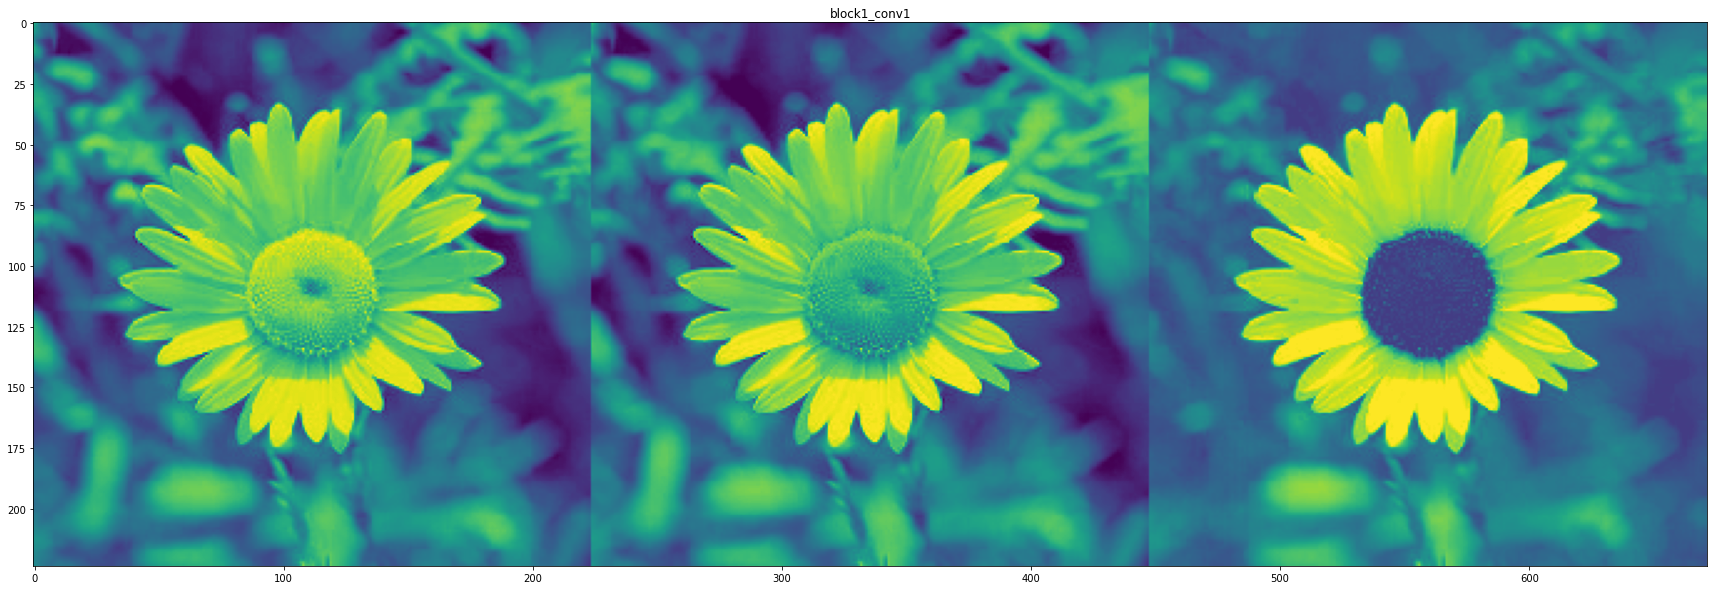

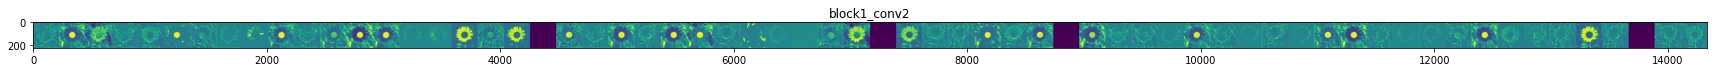

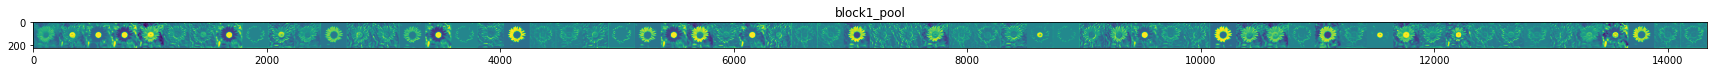

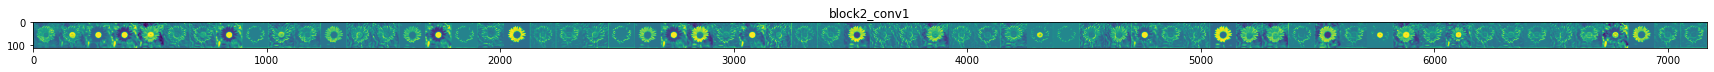

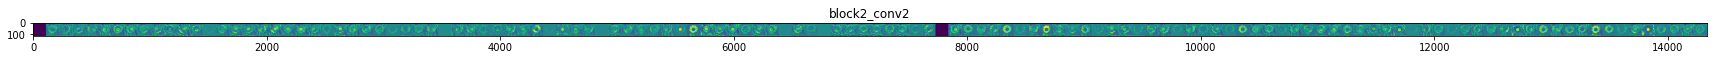

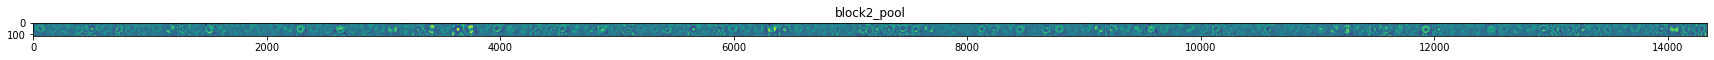

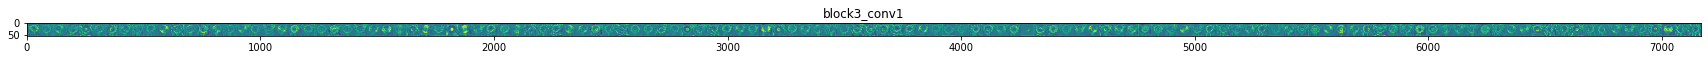

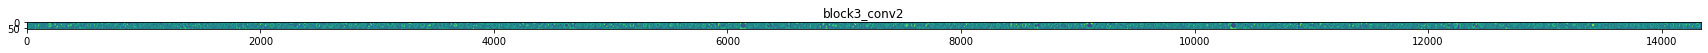

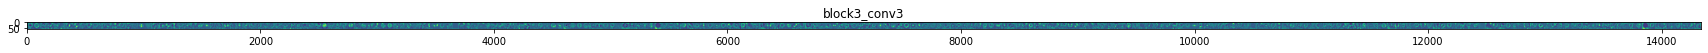

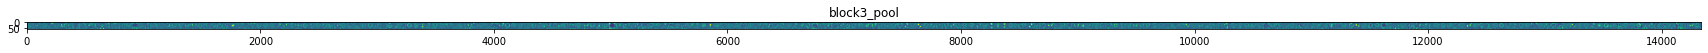

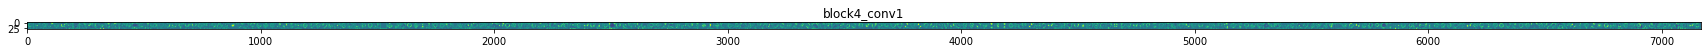

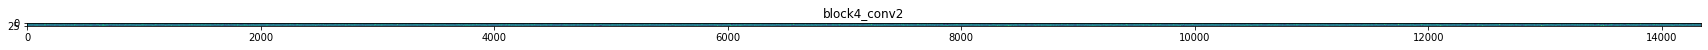

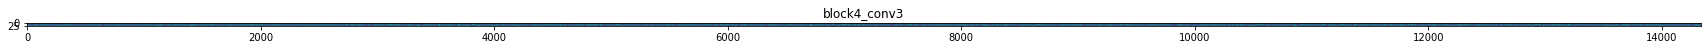

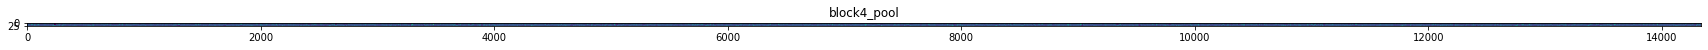

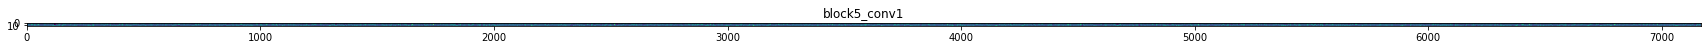

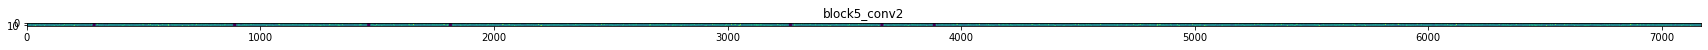

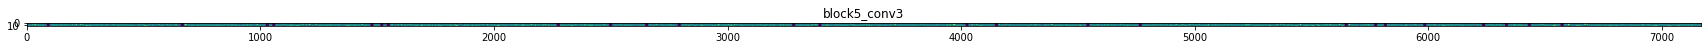

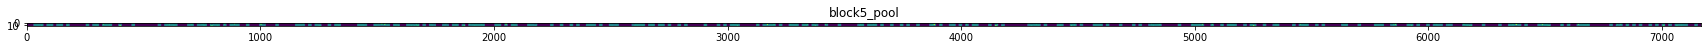

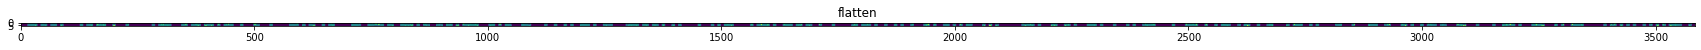

In [40]:
layer_names = [layer.name for layer in vgg.layers[1:]]
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    n_features = feature_map.shape[-1]
    size = feature_map.shape[1]  #(1, size, size, n_features)
    
    display_grid = np.zeros((size, size * n_features))
    
    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')

      display_grid[:, i * size : (i + 1) * size] = x

    scale = 30. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

## Filtros

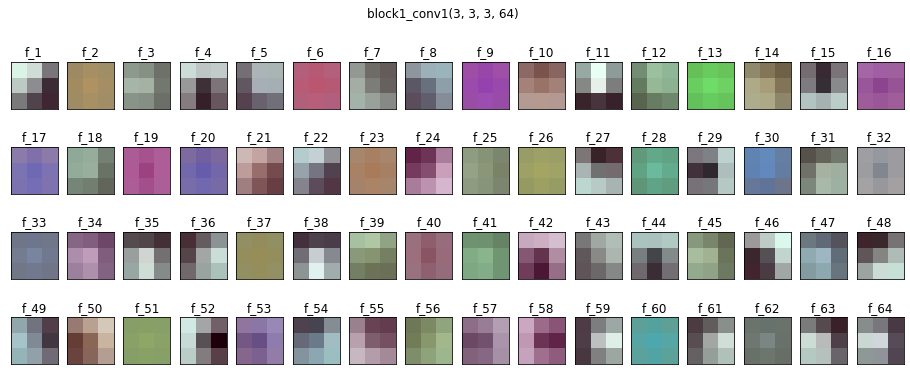

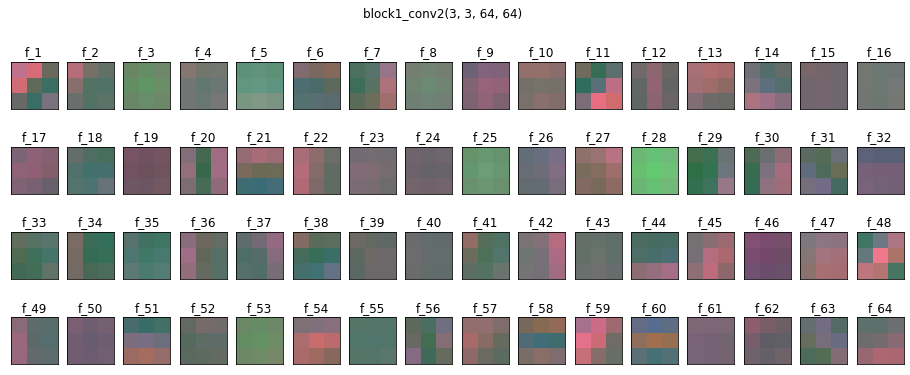

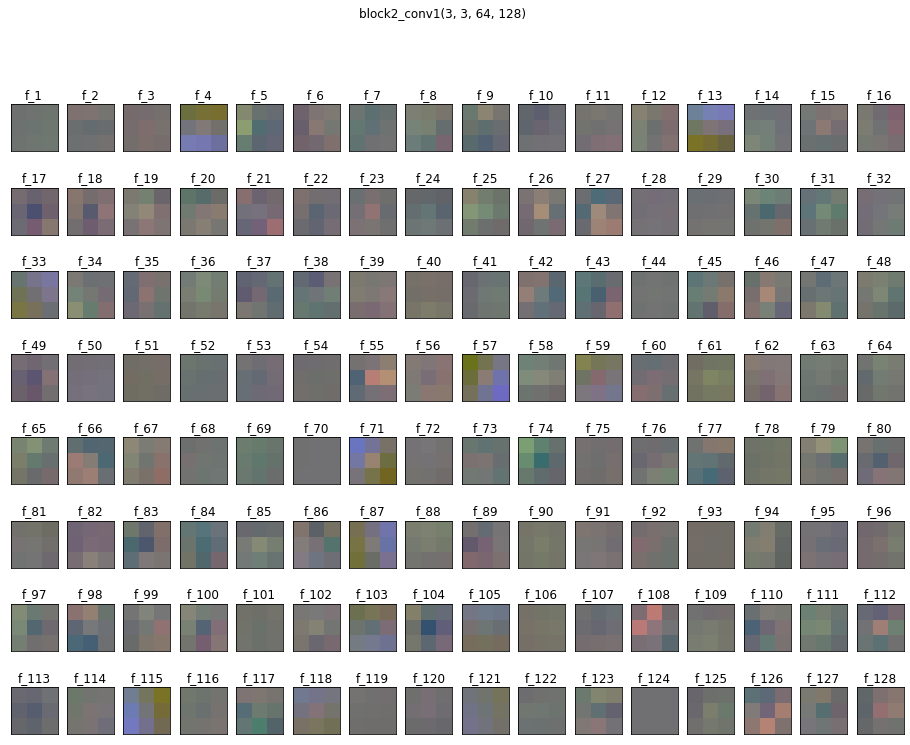

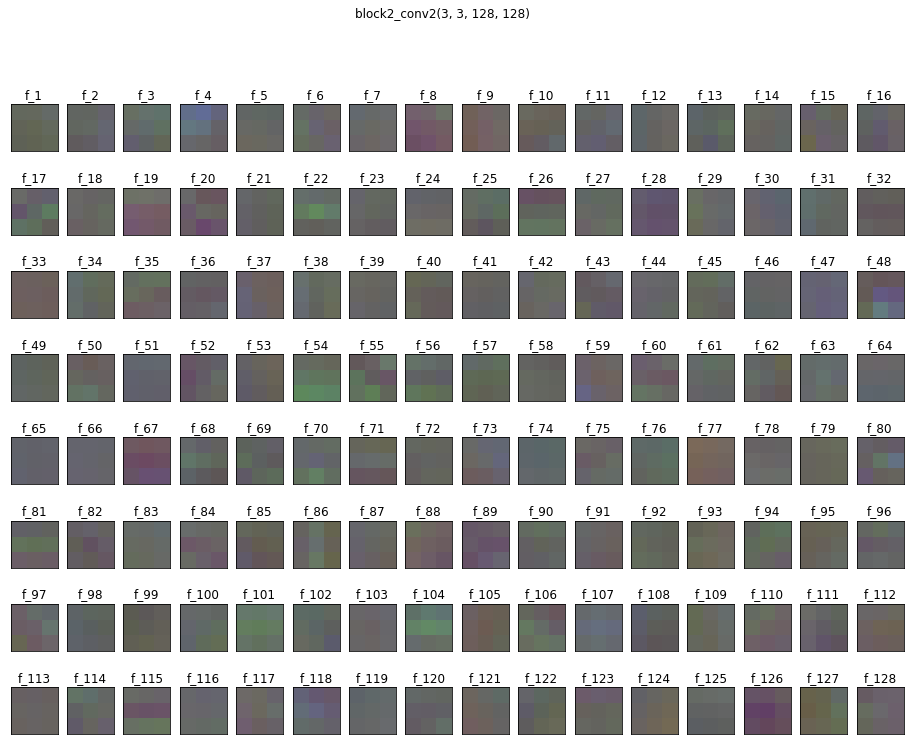

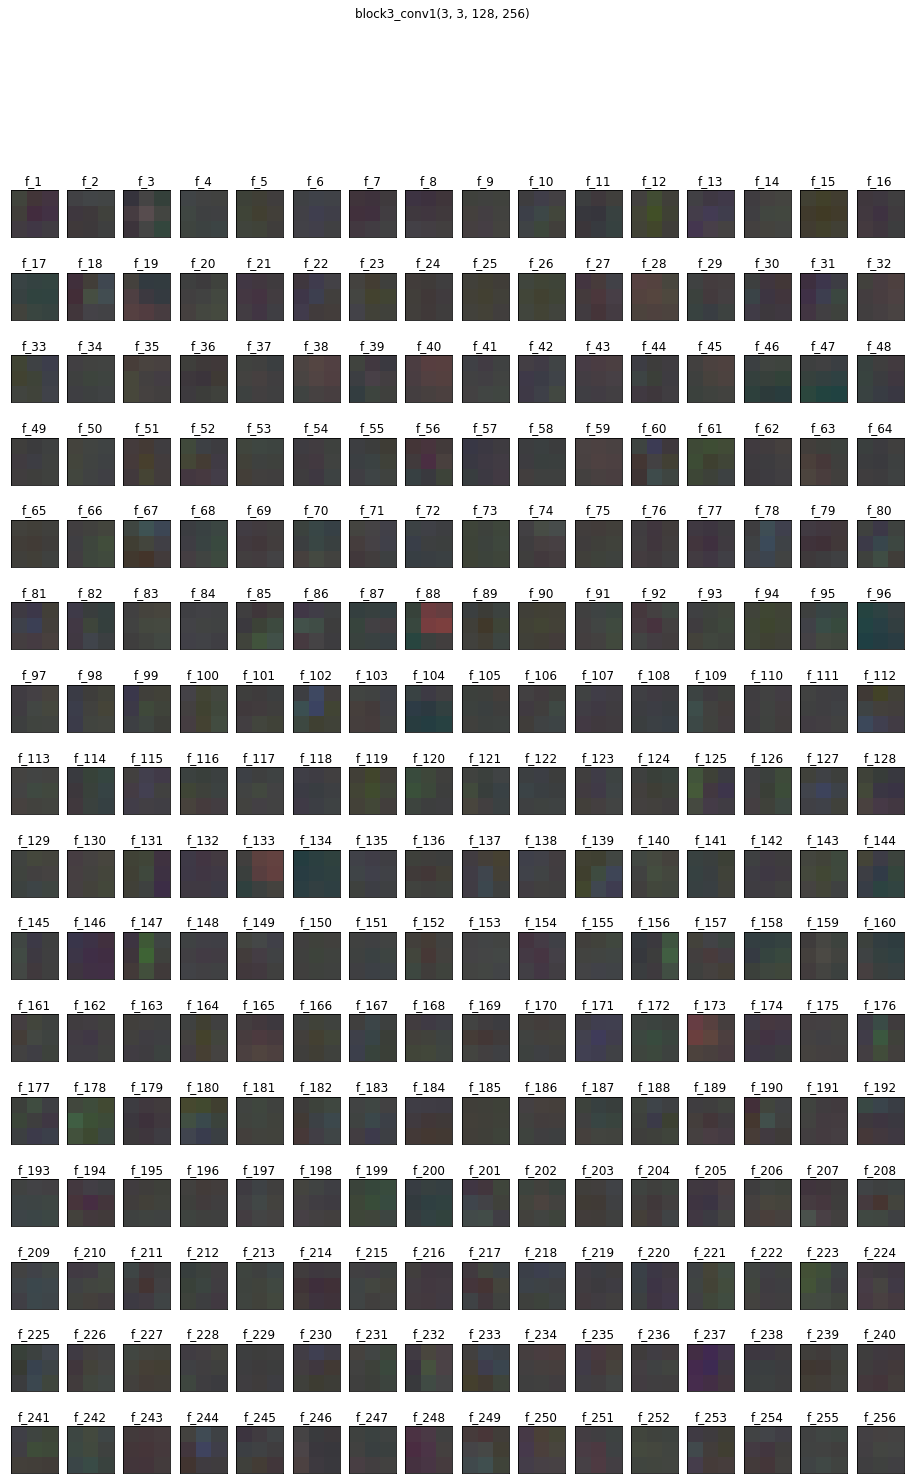

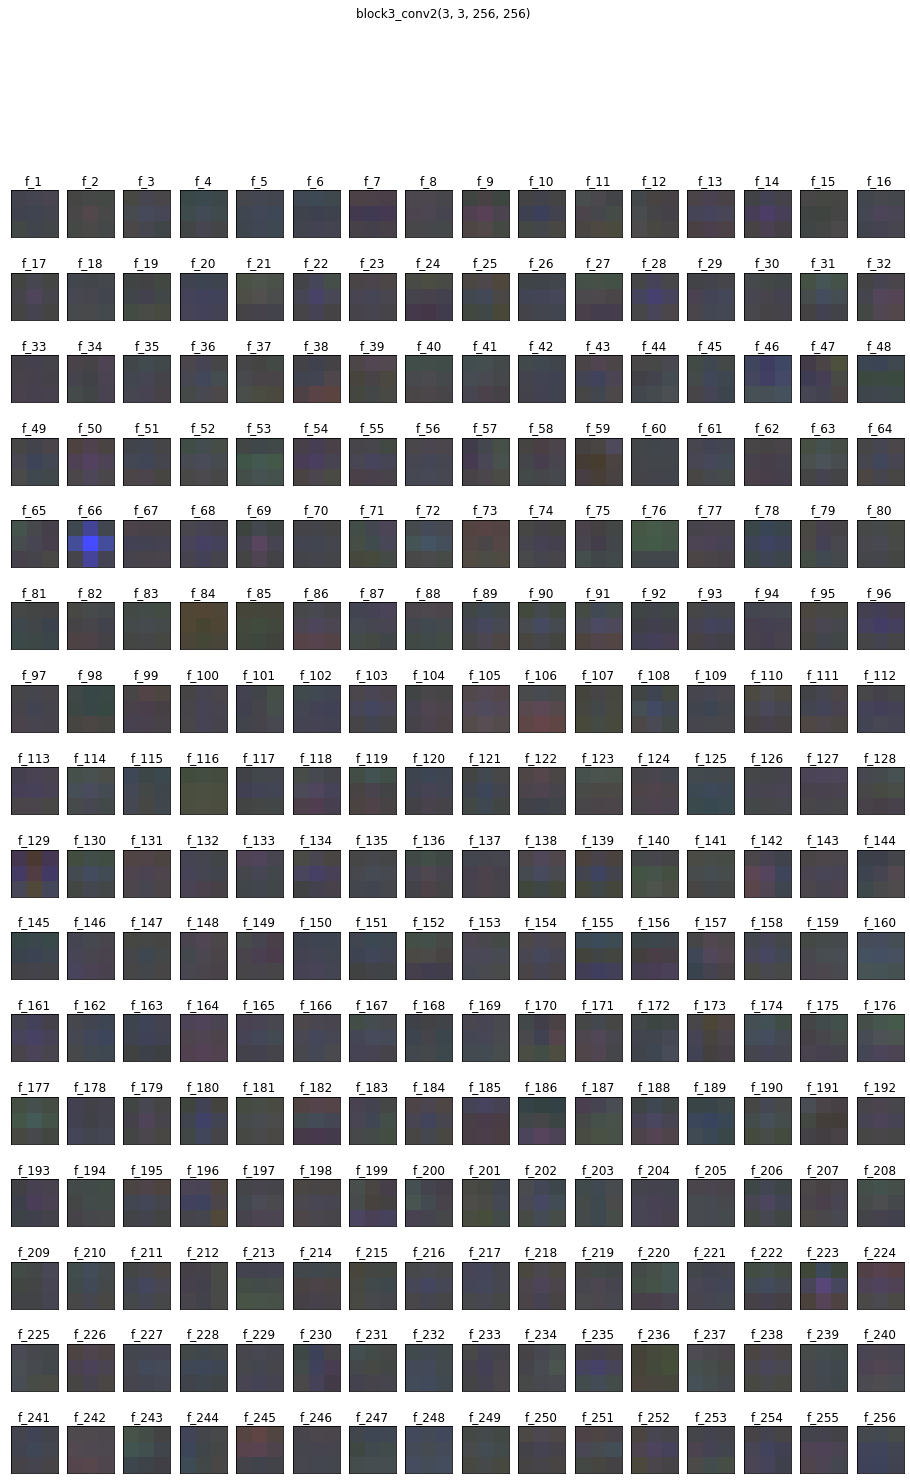

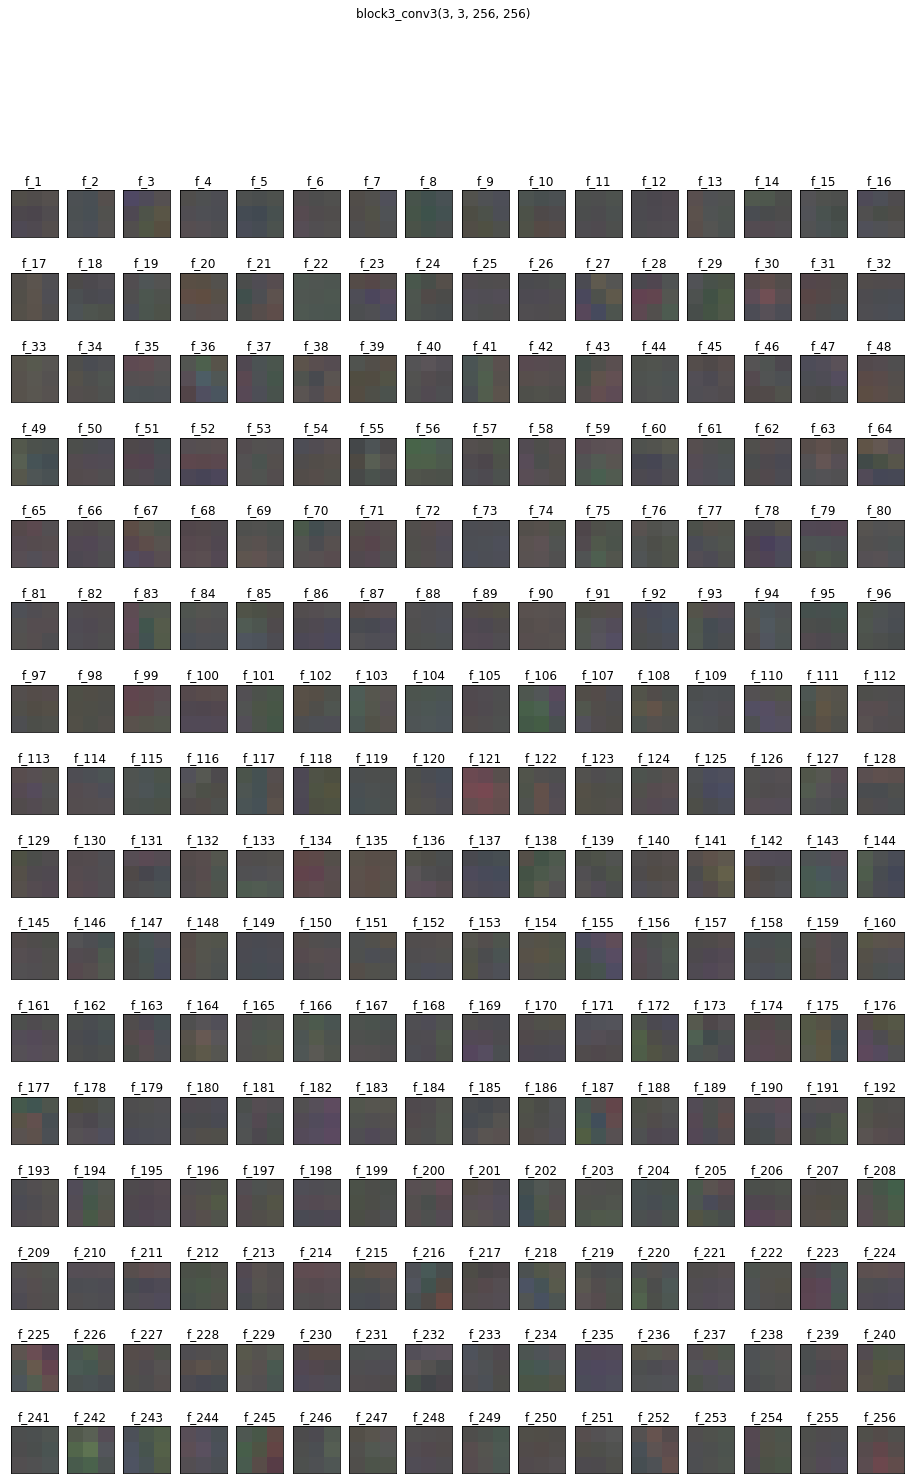

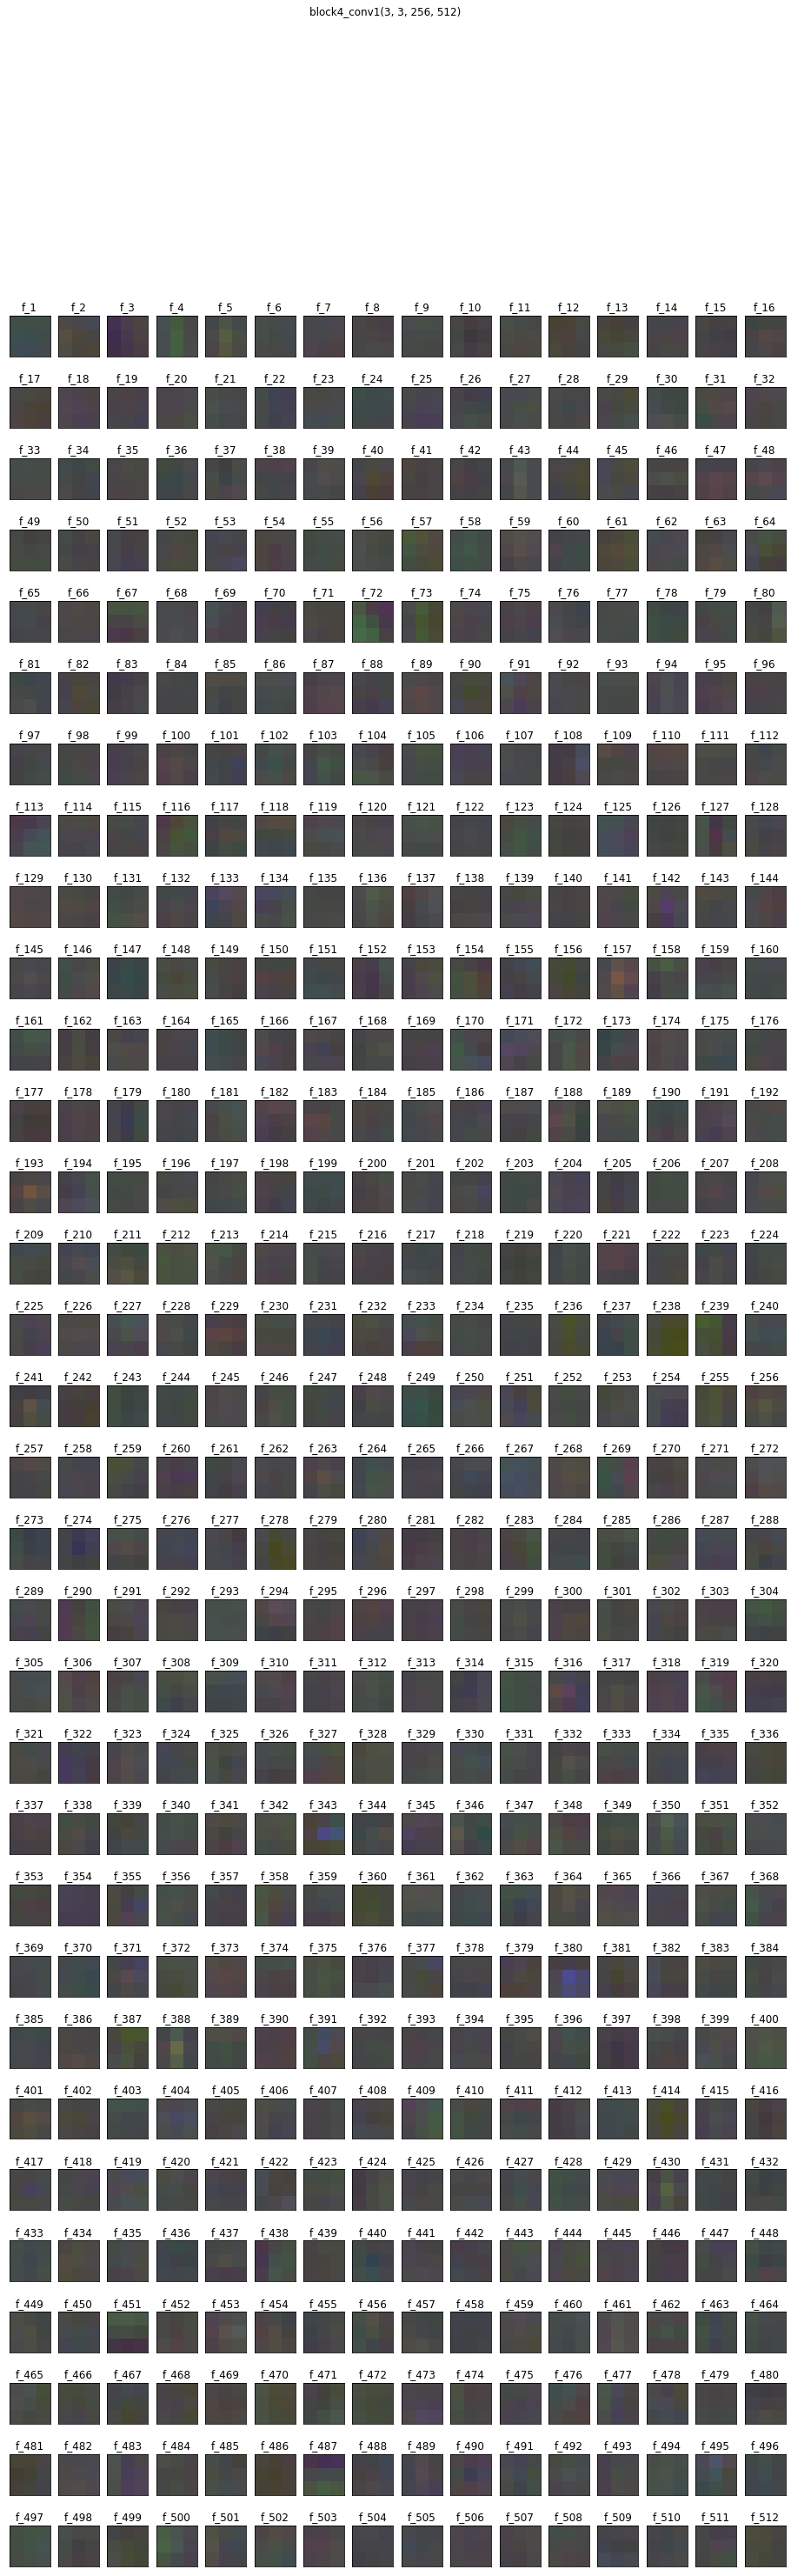

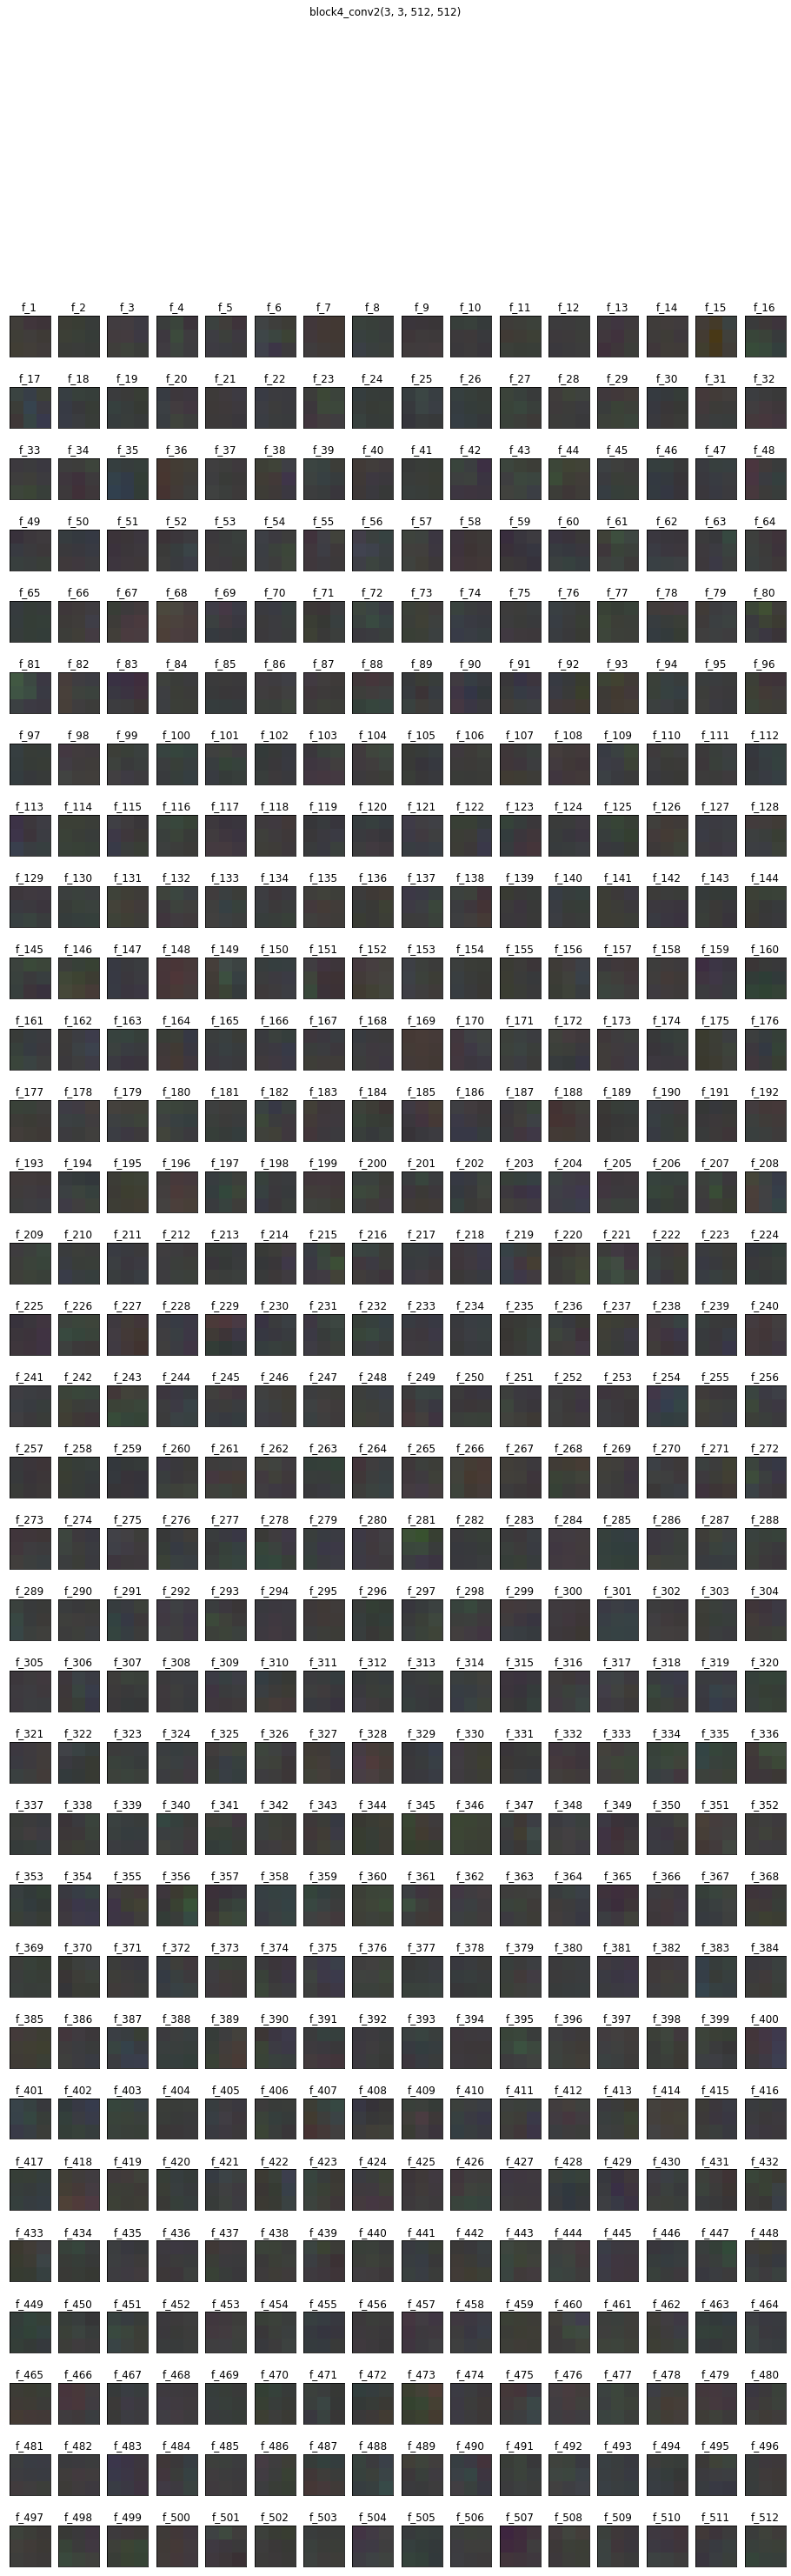

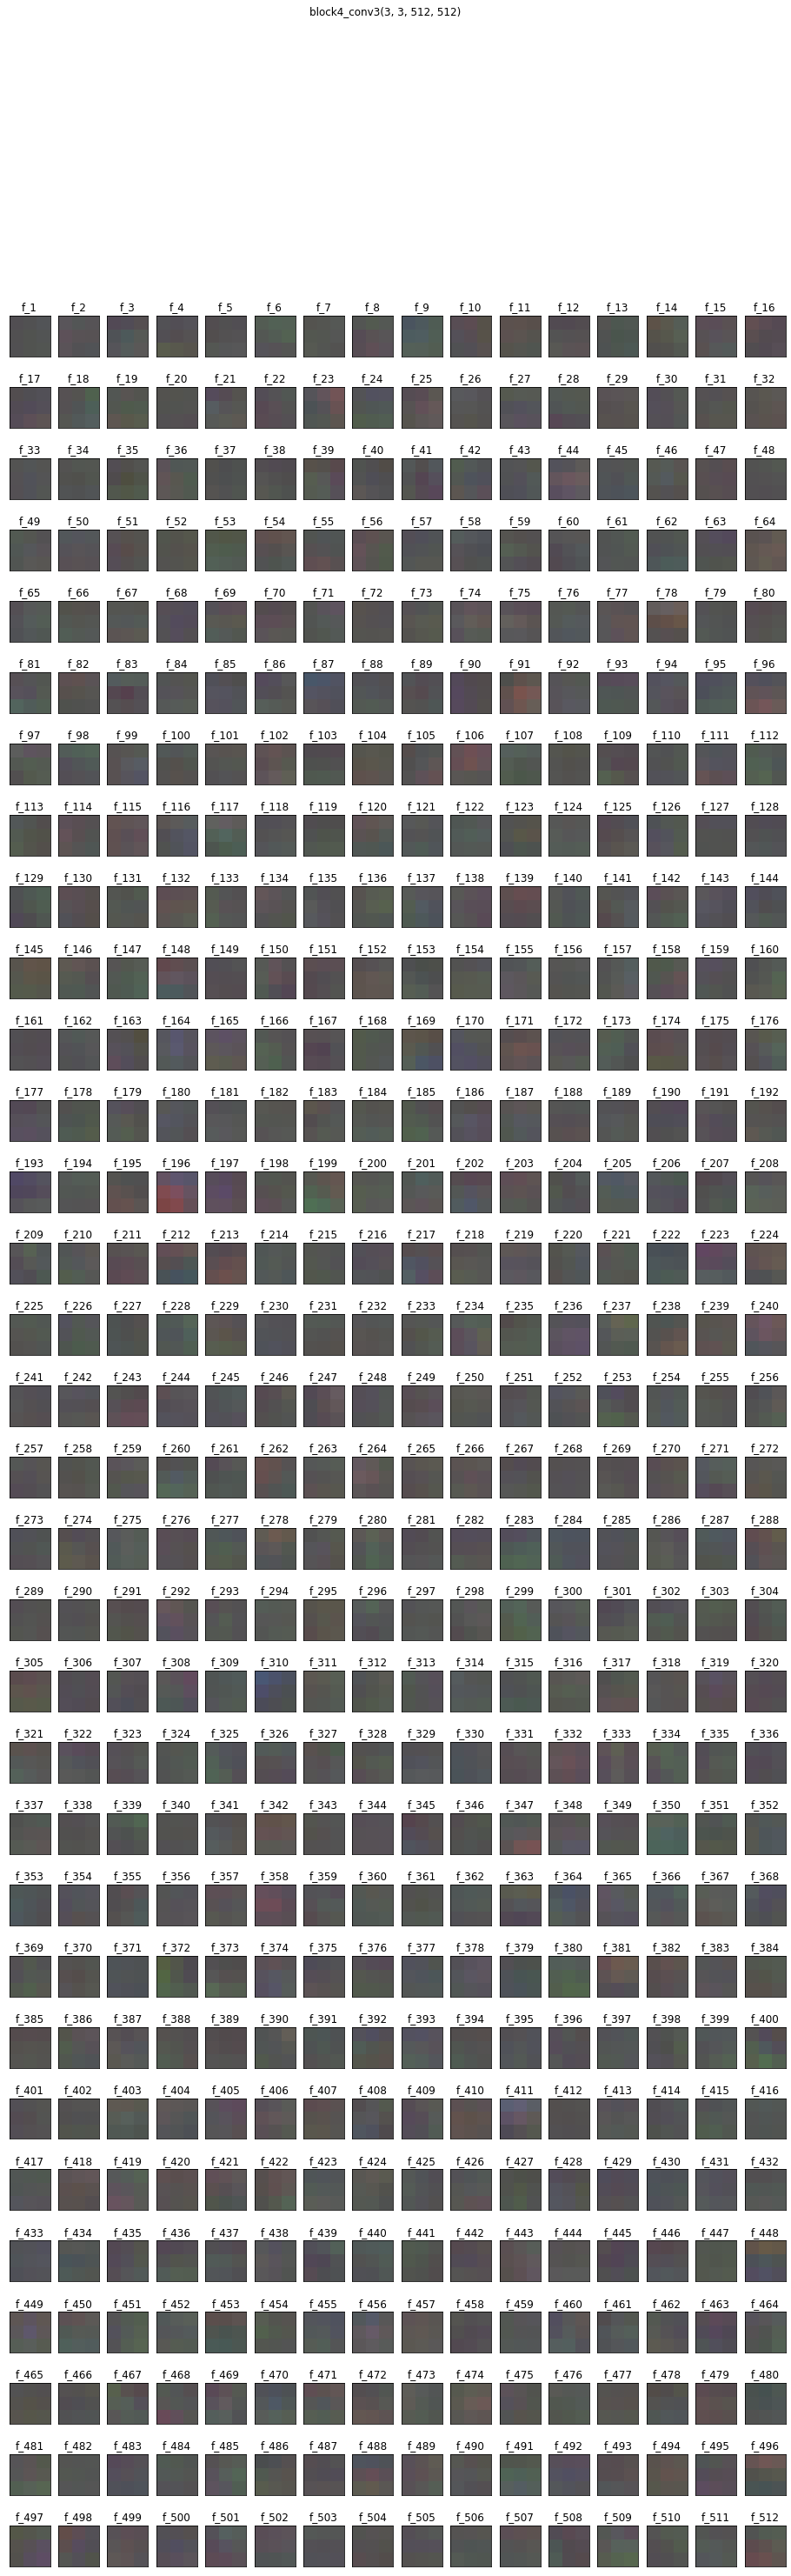

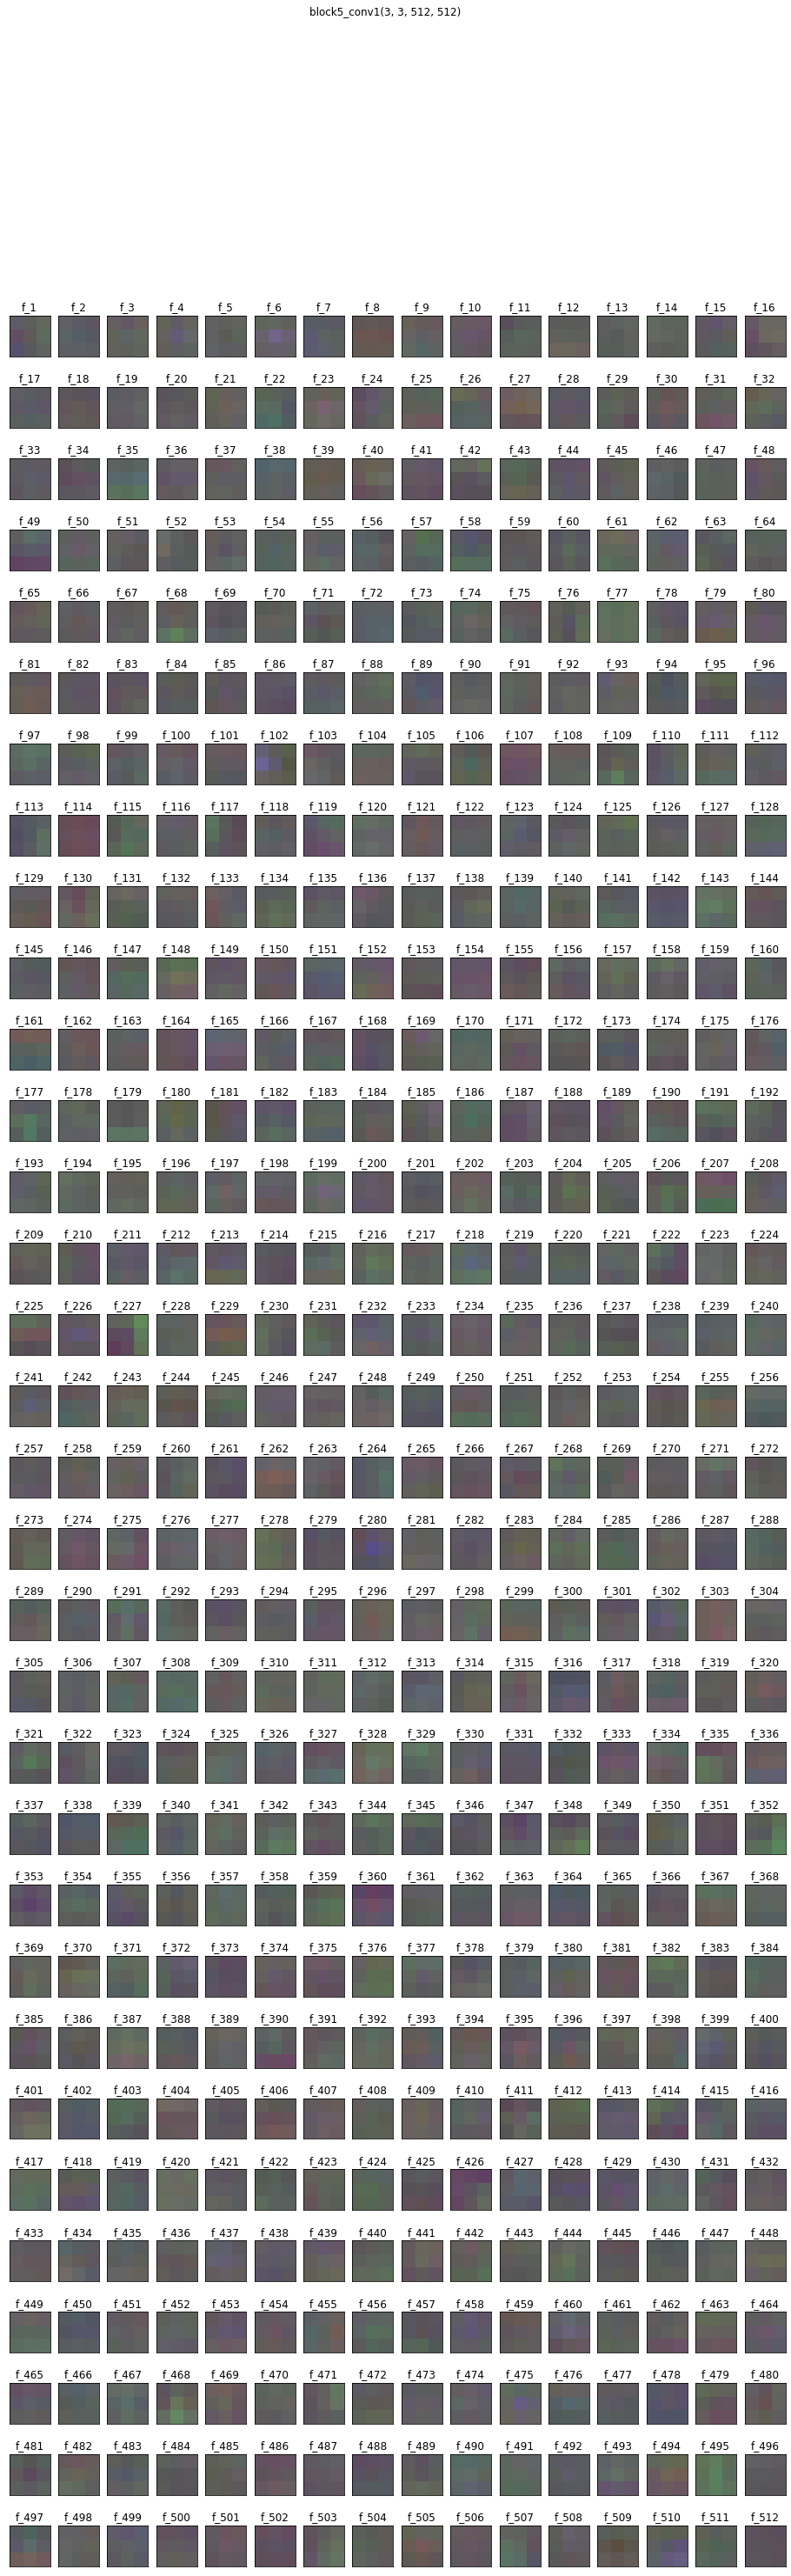

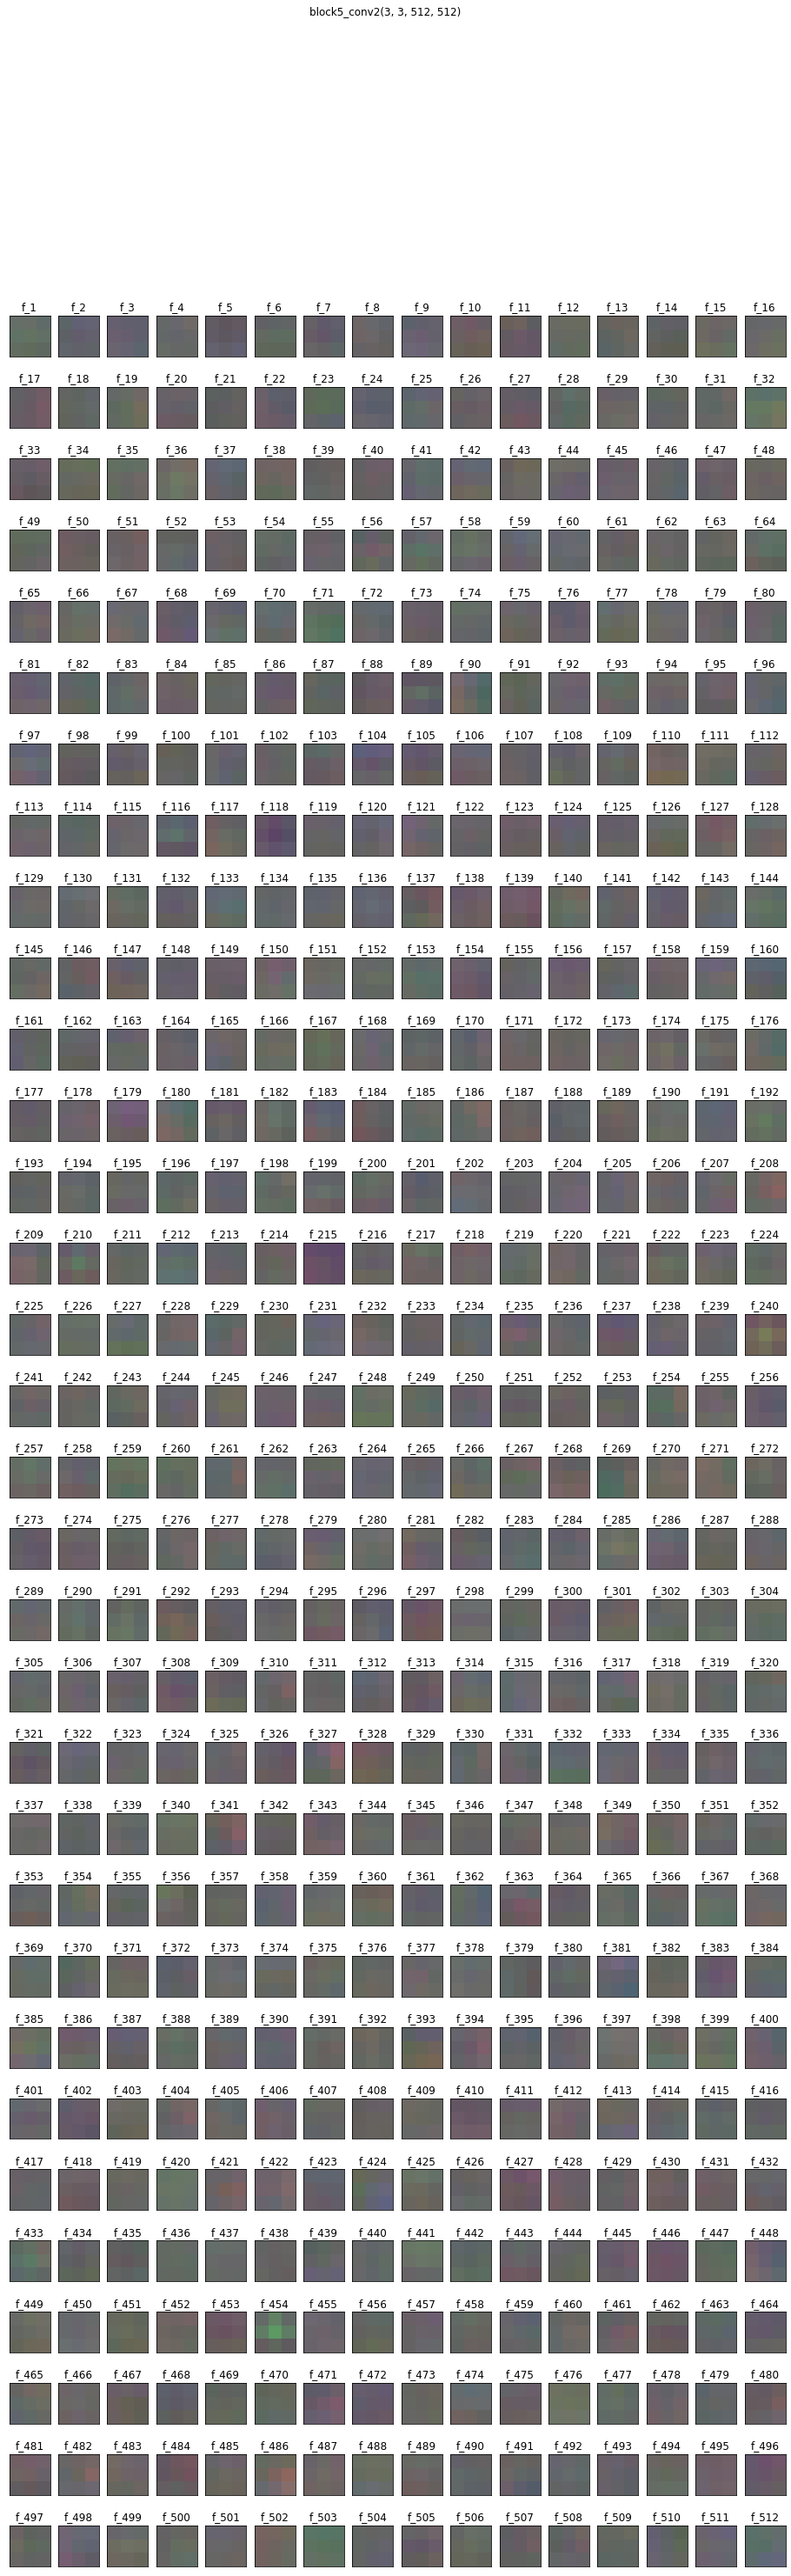

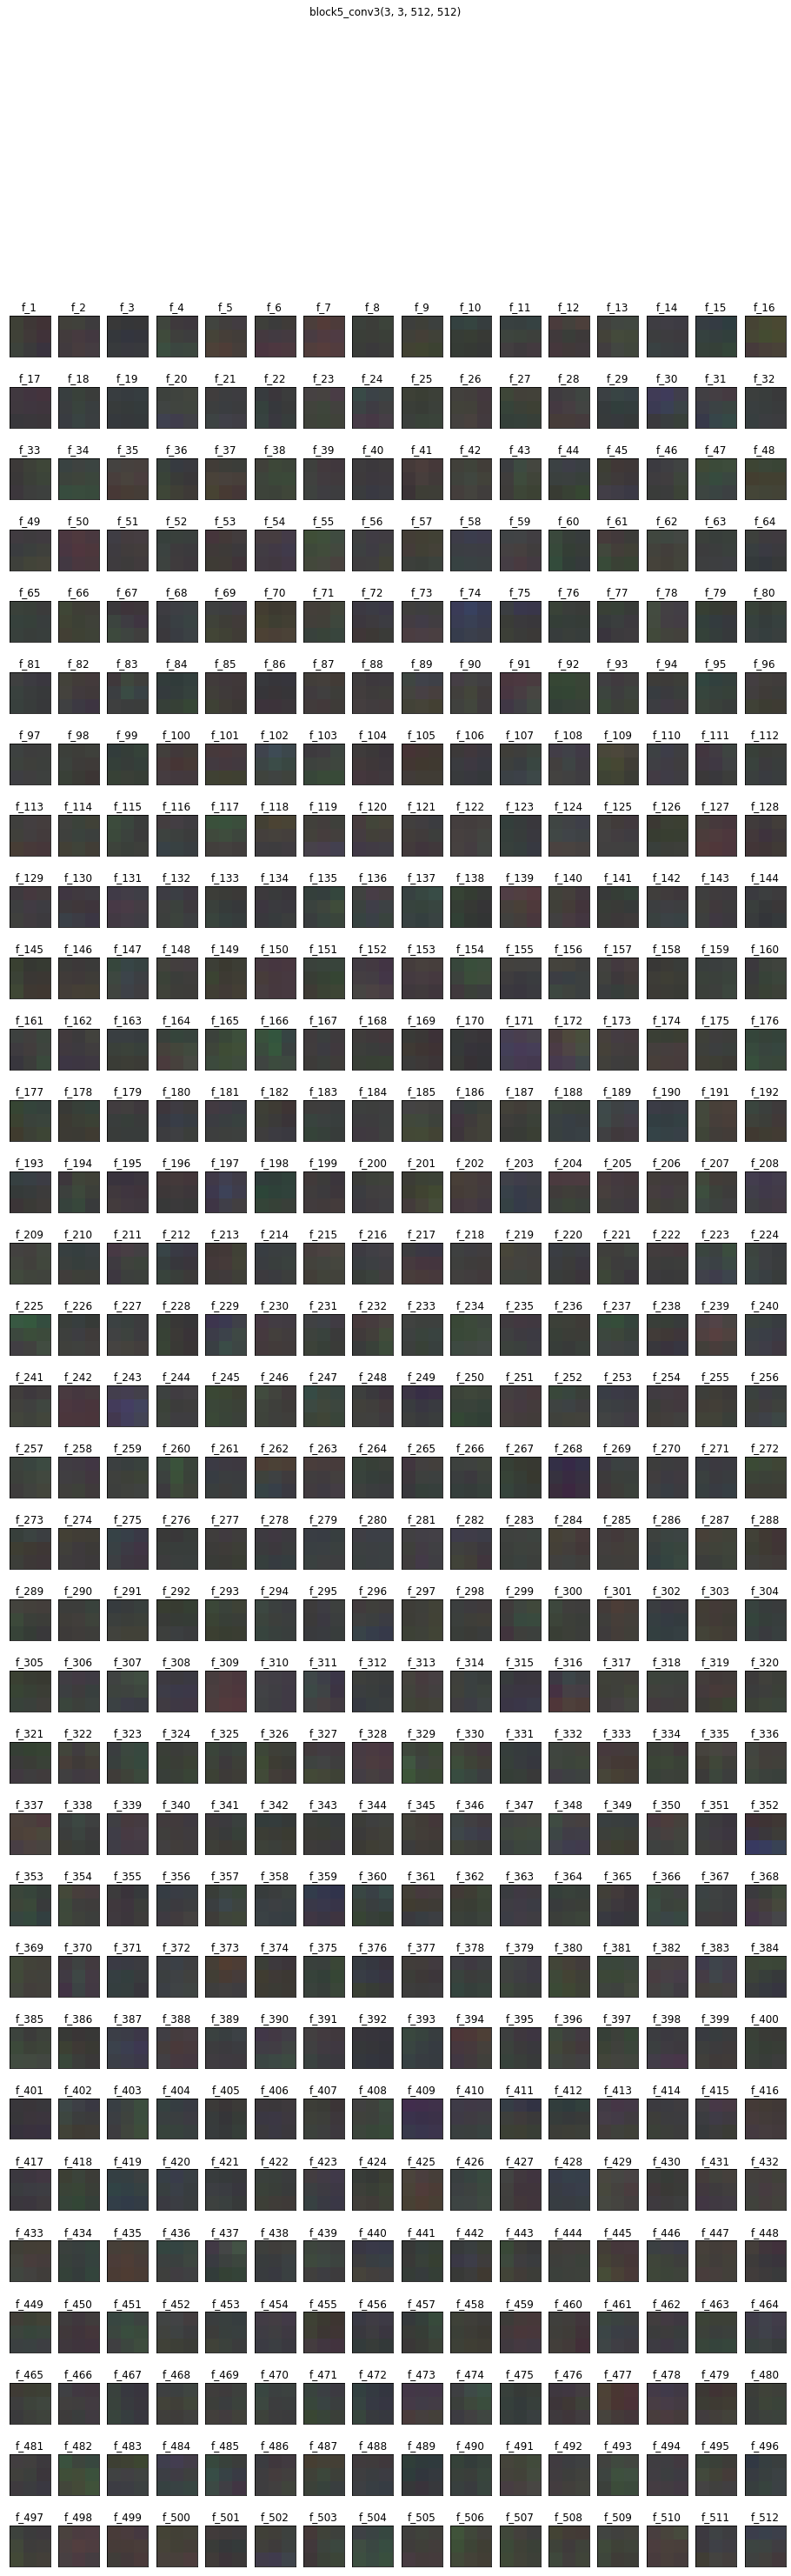

In [41]:
for layer in vgg.layers:
    if 'conv' in layer.name:
        weights, bias = layer.get_weights()

        f_min, f_max = weights.min(), weights.max()
        filters = (weights - f_min) / (f_max - f_min)

        filter_cnt = 1
        
        rows = filters.shape[3] // 16
        cols = 16
        fig, axs = plt.subplots(nrows=rows, ncols=cols, figsize=(cols, rows * 1.5), subplot_kw={'xticks': [], 'yticks': []})
        feature_count = 0

        for ax in axs.flat:
          ax.imshow(filters[:, :, 0:3, feature_count], cmap='viridis')
          ax.set_title('f_' + str(feature_count+1))
          feature_count += 1

        plt.suptitle(str(layer.name) + str(weights.shape))
        plt.show()

# Referências

* https://towardsdatascience.com/convolutional-neural-network-feature-map-and-filter-visualization-f75012a5a49c
* https://towardsdatascience.com/applied-deep-learning-part-4-convolutional-neural-networks-584bc134c1e2
* https://www.kaggle.com/c/dogs-vs-cats
* https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks/
* https://www.kaggle.com/code/bulentsiyah/dogs-vs-cats-classification-vgg16-fine-tuning
* https://www.kaggle.com/datasets/alxmamaev/flowers-recognition
* https://www.gopichandrakesan.com/day-34-predict-an-image-using-vgg16-pretrained-model/